Task 1

([], [])

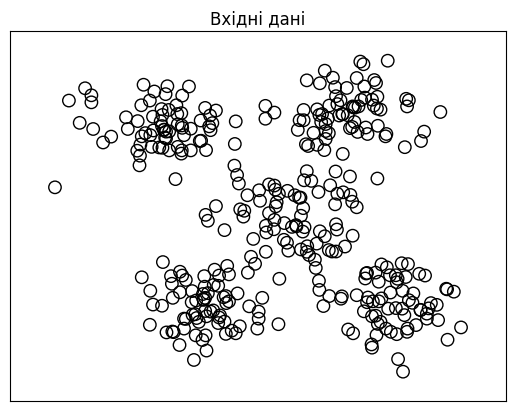

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

# Завантажимо вхідні дані із файлу
X = np.loadtxt('data_clustering.txt',delimiter=',')

# Щоб застосовувати k-середніх необхідно задати кількість кластерів
num_clusters = 5

# Включення вхідних даних до графіка
plt.figure()
plt.scatter(X[:,0],X[:,1],marker='o',facecolors='none',edgecolors='black',s=80)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

plt.title('Вхідні дані')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

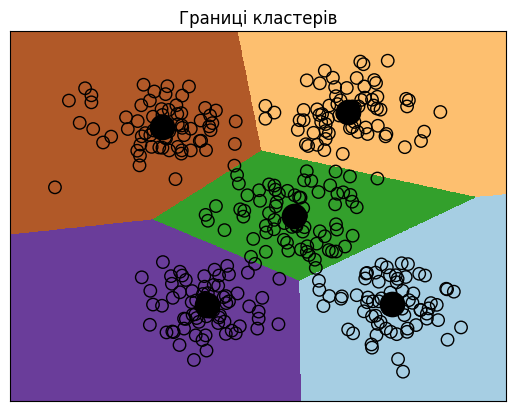

In [ ]:
# Створення об'єкту KMeans
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Навчимо модель к-середніх на вхідних даних
kmeans.fit(X)

# Визначимо крок сітки
step_size = 0.01

#Відображення точок сітки
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size),np.arange(y_min, y_max, step_size))

# Передбачення вихідних міток для всіх точок сітки
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

# Графічне відображення областей та виділення їх кольором
output = output.reshape(x_vals.shape)

plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired, aspect='auto', origin='lower')

# Відображення вхідних точок
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=80)

# Відображення центрів кластерів
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='o', s=210, linewidths=4, color='black', zorder=12, facecolors='black')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

plt.title('Границі кластерів')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
plt.show()

Task 2

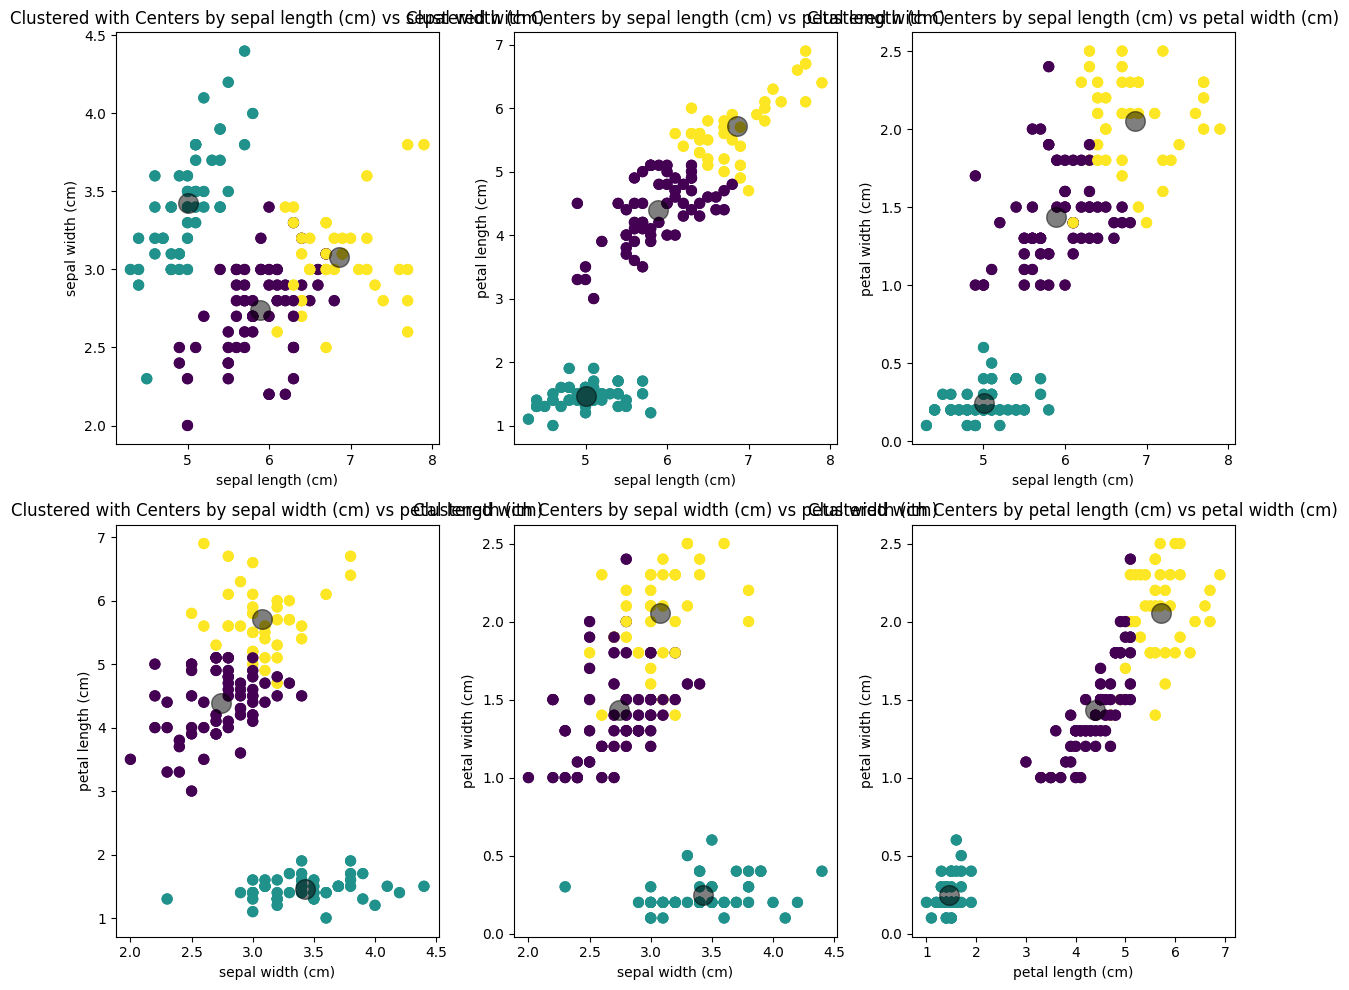

In [10]:
# Імпортуємо необхідні бібліотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Завантажуємо набір даних Iris
iris = load_iris()  # load_iris завантажує дані квітів ірису
X = iris['data']  # Вибірка з чотирма атрибутами: довжина чашолистка, ширина чашолистка, довжина пелюстки, ширина пелюстки
y = iris['target']  # Мітки класів квітів (Setosa, Versicolour, Virginica)

# Створення моделі KMeans з 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=0)

# Навчання моделі на даних X
kmeans.fit(X)

# Прогнозування кластерів для кожного зразка в наборі даних
y_kmeans = kmeans.predict(X)

# Параметри для створення графіків
feature_names = iris['feature_names']
combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Створюємо графіки для кожної комбінації атрибутів
plt.figure(figsize=(12, 10))
for i, (x_idx, y_idx) in enumerate(combinations):
    plt.subplot(2, 3, i + 1)
    plt.scatter(X[:, x_idx], X[:, y_idx], c=y_kmeans, s=50, cmap='viridis')
    plt.xlabel(feature_names[x_idx])
    plt.ylabel(feature_names[y_idx])
    plt.title(f'Clustered by {feature_names[x_idx]} vs {feature_names[y_idx]}')

# Візуалізація центрів кластерів
centers = kmeans.cluster_centers_
for i, (x_idx, y_idx) in enumerate(combinations):
    plt.subplot(2, 3, i + 1)
    plt.scatter(X[:, x_idx], X[:, y_idx], c=y_kmeans, s=50, cmap='viridis')
    plt.scatter(centers[:, x_idx], centers[:, y_idx], c='black', s=200, alpha=0.5)
    plt.xlabel(feature_names[x_idx])
    plt.ylabel(feature_names[y_idx])
    plt.title(f'Clustered with Centers by {feature_names[x_idx]} vs {feature_names[y_idx]}')

# Показуємо графіки
plt.tight_layout()
plt.show()

Task 3


Centers of clusters:
 [[2.95568966 1.95775862]
 [7.20690909 2.20836364]
 [2.17603774 8.03283019]
 [5.97960784 8.39078431]
 [4.99466667 4.65844444]]

Number of clusters in input data = 5


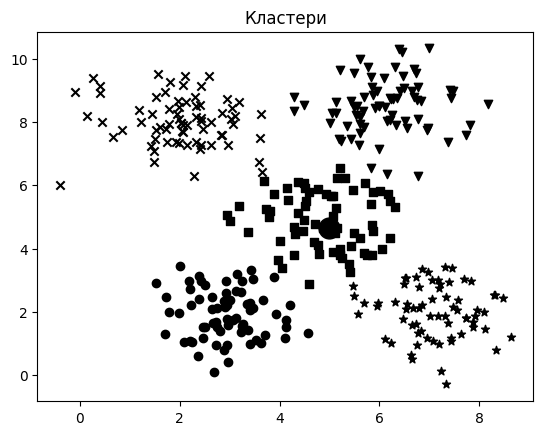

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle
# Завантажимо вхідні дані.
# Завантаження
X = np.loadtxt('data_clustering.txt', delimiter=',')

# Оцінка ширини вікна для X
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

# Навчимо модель кластеризації на основі зсуву середнього, використовуючи отриману оцінку ширини вікна.
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

# Витягуємо центри всіх кластерів.
cluster_centers = meanshift_model.cluster_centers_
print('\nCenters of clusters:\n', cluster_centers)

# Витягуємо кількість кластерів.
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters)
plt.figure()
markers = 'o*xvs'

for i, marker in zip(range(num_clusters), markers):
  # Відображення на графіку точок, приналежащих
  # поточному кластеру
  plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker,color='black')

# Відображення на графіку центру кластера
cluster_center = cluster_centers[i]
plt.plot(cluster_center[0], cluster_center[1], marker='o',markerfacecolor='black', markeredgecolor='black',markersize=15)
plt.title('Кластери')
plt.show()

Task 4 - no json file to execute